<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
#  Análise de Risco de sinistros Residenciais com Machine Learning

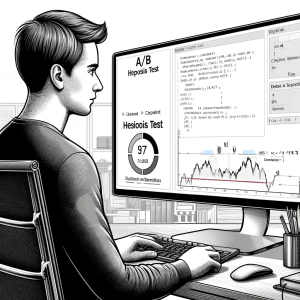

**********************************************************************************
# 1. Introdução

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
    Neste projeto, abordamos a complexa questão dos sinistros residenciais através de técnicas avançadas de machine learning. O objetivo é desenvolver um modelo preditivo que possa identificar o risco de sinistros com base em uma série de características das propriedades seguradas.

**********************************************************************************
# 2. Contexto

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
Os sinistros residenciais representam uma significativa preocupação para as seguradoras, dado que impactam diretamente na sustentabilidade financeira e na satisfação do cliente. A previsão eficaz de sinistros pode ajudar as seguradoras a aprimorar suas estratégias de precificação e mitigação de riscos.

**********************************************************************************
# 3. Problema Proposto

<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
    O desafio consiste em analisar um conjunto de dados de propriedades residenciais e seus históricos de sinistros para construir um modelo que preveja a probabilidade de ocorrência de um sinistro. 

**********************************************************************************
# 4. Metodologia

<div style='line-height: 1.8; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
  
   
* Preparação dos Dados: Limpeza e transformação de dados para garantir a qualidade e a adequação ao modelo de machine learning.
* Exploração de Dados: Análise exploratória para entender as características e a distribuição das variáveis.
* Modelagem Estatística: Utilização de técnicas estatísticas para identificar correlações e padrões significativos.
* Desenvolvimento de Modelo de ML: Treinamento de modelos de classificação para prever sinistros.
* Validação e Teste: Avaliação do modelo através de métricas de desempenho e validação cruzada para garantir a generalização.
* Interpretação e Implementação: Discussão dos resultados e planejamento para a implementação operacional do modelo.

**********************************************************************************
# 5. Importação de Bibliotecas


## Preparação do Ambiente de Análise


<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>
    
Inicializa o ambiente de análise carregando todas as bibliotecas necessárias para manipulação de dados, análise estatística e visualização, garantindo que todas as ferramentas estejam disponíveis para as etapas subsequentes.

In [ ]:
# Importando bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from scipy.stats import ttest_ind
import plotly.express as px
from IPython.display import display, Markdown, HTML
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, cross_val_score

# Configurações estéticas dos gráficos do Seaborn e supressão de avisos
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings("ignore")

# Configurações adicionais de visualização
%matplotlib inline


**********************************************************************************
# 6. Carregamento de Dados

In [ ]:
# Carregamento de dados
try:
    dados = pd.read_csv('dados_seguro_residenciais.csv', delimiter=';', encoding='utf-8')
    display(Markdown("<h3 style='color: darkred'>Dados carregados com sucesso!!</h3>"))
except FileNotFoundError:
    display(Markdown("<h3 style='color: darkred'>Não foi possível carregar o arquivo!!</h3>"))


****************************
# 7.  Exploração Inicial dos Dados


********************
## 7.1. Primeiras linhas do DataFrame para inspeção inicial


In [ ]:
# Exibir as primeiras linhas e informações dos dados
display(dados.head())
display(dados.info())


******************
## 7.2. Verificação de Dados Faltantes

In [ ]:
# Verificação de dados faltantes
if dados.isnull().sum().sum() == 0:
    display(Markdown("<h3 style='color: darkblue'> Não foi encontrado dados faltantes no DataSet.</h3>"))
else:
    display(Markdown("<h3 style='color: darkblue'> Existem dados faltantes no DataSet.</h3>"))


**********************************************************************************
## 7.3. Apresenta Metadados de Cada Variável:


    
  
| Variável         | Descrição                                                    | Tipo de Dados |
|------------------|--------------------------------------------------------------|---------------|
| `cidade_residencia`      | Nome da cidade da propriedade segurada             | `object`      |
| `idade_prop`     | Idade do proprietário da propriedade                         | `int64`       |
| `valor_imovel`   | Valor estimado da propriedade                                | `float64`     |
| `tipo_construcao`| Tipo de construção da propriedade (casa, apartamento, etc.)  | `object`      |
| `hist_sinistro`  | Indica se houve sinistros anteriores na propriedade (1 para sim, 0 para não)| `object`      |
| `valor_premio_seguro` | Valor do prêmio do seguro da propriedade                     | `float64`     |
| `sinistro`       | Indica se ocorreu um sinistro (0 para Não, 1 para Sim)       | `int64`       |
| `regiao`         | Informa qual das regiões presentes no Brasil está o imóvel   | `object`      |
| `renda_anual`    | Renda anual do proprietário da propriedade                   | `float64`     |
| `historico_credito` | Score de crédito do proprietário                           | `int64`       |
| `numero_dependentes` | Número de pessoas dependentes do proprietário              | `int64`       |
| `ano_construcao`  | Ano de construção da propriedade                             | `int64`       |
| `distancia_bombeiros` | Distância até a estação de bombeiros mais próxima        | `float64`     |
| `sistema_alarme` | Indica se a propriedade possui sistema de alarme (1 para sim, 0 para não) | `int64` |
| `cameras_seguranca` | Indica se a propriedade possui câmeras de segurança (1 para sim, 0 para não) | `int64` |
| `estado`         | Estado onde a propriedade está localizada                    | `object`      |
| `valor_seguro`   | Valor total do seguro da propriedade                         | `float64`     |

</div>


# 7.2.1 Verificação do Número de Observações e Colunas

In [ ]:
# Verificação de número de observações e colunas
display(Markdown(f"<h3 style='color: darkblue'>Verificamos a existência de {dados.shape[0]} observações e {dados.shape[1]} colunas no DataSet.</h3>"))


*************************
## 7.3.1 Contabilizando o número de valores únicos em cada variável do dataset.

In [ ]:
# Contabilizando o número de valores únicos em cada variável do dataset.

num_valor_unico = dados.nunique().sort_values()

# Determinando o tipo de dado de cada uma das variáveis do dataset.

num_valor_unico = pd.DataFrame(num_valor_unico.values, index = num_valor_unico.index, columns = ['valor_unicos'])

# Atribuindo informações sobre o tipo de dado das variáveis ao DataFrame.

num_valor_unico

*********************
## 7.4. Análise de dados faltantes

In [ ]:
# Calcula o total e a porcentagem de dados faltantes por coluna

total_faltantes = dados.isnull().sum()

percentual_faltantes = (dados.isnull().mean() * 100)

# Criar um DataFrame para a tabela resumida

tabela_resumo_faltantes = pd.DataFrame({
    'Coluna': total_faltantes.index,
    
    'Dados Faltantes': total_faltantes.values,
    
    'Percentual (%)': percentual_faltantes.values
})

# Ordenar a tabela pelo número de dados faltantes

if (total_faltantes > 0).any():
    tabela_resumo_faltantes = tabela_resumo_faltantes.sort_values(by='Dados Faltantes', ascending=False)
else:
    tabela_resumo_faltantes = tabela_resumo_faltantes
# Exibi a tabela resumida

display(Markdown("<h3 style='color: darkblue'>Tabela Resumo de Dados Faltantes</h3>"))

print(tabela_resumo_faltantes)

******************************
## 7.5 Análise de Dados Duplicados

In [ ]:
# Conta o número de registros duplicados

numero_duplicados = dados.duplicated().sum()

# calcula a porcentagem de duplicatas em relação ao total

percentual_duplicados = (numero_duplicados / len(dados)) * 100

if numero_duplicados > 0: # informa quantidade de dados duplicados
  
    display(Markdown(f"<h3 style='color: darkred'>Foram encontrados {numero_duplicados} registros duplicados, representando {percentual_duplicados:.2f}% do total de {dados.shape[0]} registros!</h3>"))
    
else:  # informa se não existe dados duplicados 
   
    display(Markdown("<h2 style='color: red'>Não foram encontrados dados duplicados no conjunto de dados</h2>"))


print()

***************************************
# 7.6.  Resumo Estatístico das Variáveis Numéricas

In [ ]:

# Configurando a formatação global de números flutuantes para duas casas decimais

pd.options.display.float_format = '{:.2f}'.format

# Gerando o resumo estatístico dos dados
estatisticas = dados.describe()

# Renomeando as colunas e índices do resumo estatístico para português
estatisticas.rename(columns={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º quartil 25%',
    '50%': 'mediana 50%',
    '75%': '3º quartil 75%',
    'max': 'máximo'
}, index={
    'count': 'contagem',
    'mean': 'média',
    'std': 'desvio_padrão',
    'min': 'mínimo',
    '25%': '1º quartil 25%',
    '50%': 'mediana 50%',
    '75%': '3º quartil 75%',
    'max': 'máximo'
}, inplace=True)

# Imprimindo o resumo estatístico formatado e traduzido
print(estatisticas)


**********************
## 7.7. Visualizando da Distribuição da Idade dos Proprietários


In [ ]:
# Histograma simplificado da idade dos proprietários

plt.figure(figsize=(12, 6)) # define dimenção do gráfico

bins_valor = range(21, 75, 5)  # Definindo bins de 21 a 75 com passo de 5

histograma = sns.histplot(dados['idade_prop'], bins=21, kde=True, color='skyblue', edgecolor='black')

# Agora, ajustando os limites do eixo Y conforme a frequência máxima
max_height = histograma.patches[0].get_height()  # Começa com a altura da primeira barra

for patch in histograma.patches:
    
    if patch.get_height() > max_height:
        
        max_height = patch.get_height()  # Encontra a altura máxima

plt.ylim(0, max_height * 1.2)  # Define o limite superior do eixo y como 10% acima da barra mais alta


# Títulos e rótulos
plt.title('Distribuição da Idade dos Proprietários', fontsize=18, pad=20)   # pad define valor para espaçamento
plt.xlabel('Idade', fontsize=16, labelpad=20)
plt.ylabel('Quantidade de Proprietários', fontsize=16, labelpad=20)


# Calculando a média e convertendo para inteiro
media_idade = int(np.mean(dados['idade_prop']))

# Desenhando uma linha vertical na média e adicionando uma legenda com o valor da média
plt.axvline(media_idade, color='red', linestyle='--', label=f'Média: {media_idade}')


for p in histograma.patches:
    plt.text(
        p.get_x() + p.get_width() / 2.,  # posição x
        
        p.get_height() +1,  # posição y
        
        f'{int(p.get_height())}',  # valor inteiro da altura
        
        fontsize=11,  # tamanho da fonte
        
        color='black',  # cor do texto
        
        ha='center',  # alinhamento horizontal
        
        va='bottom',  # alinhamento vertical
    )

# Legenda
plt.legend()

# Exibir o gráfico
plt.show()




# 7.8 Análise de frequência de sinistros por faixa de idade


In [ ]:


# Agrupando as idades em faixas de 5 anos
dados['faixa_etaria'] = pd.cut(dados['idade_prop'], bins=np.arange(25, 100, 5), right=False)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Criando o gráfico de frequência de sinistros por faixa etária
plt.figure(figsize=(16, 7))
ax = sns.countplot(x='faixa_etaria', hue='sinistro', data=dados, palette=colors)
plt.title('Frequência de Sinistros por Faixa Etária', fontsize=18, pad=20)
plt.xlabel('Faixa Etária', labelpad=20, fontsize=18)
plt.ylabel('Número de Sinistros', labelpad=20, fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Sinistro Ocorrido', loc='upper right')
plt.ylim(0, 1250)  # Aumentando o limite superior para melhor visualização

# Adicionando os valores de sinistro acima de cada barra
for p in ax.patches:
   ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')

plt.tight_layout()
plt.show()

# Análise estatística da diferença entre as faixas etárias
from scipy.stats import chi2_contingency

# Criando a tabela de contingência
contingencia = pd.crosstab(dados['faixa_etaria'], dados['sinistro'])

# Realizando o teste qui-quadrado
chi2, p, _, _ = chi2_contingency(contingencia)

print(f'Resultado do Teste Qui-Quadrado: chi2 = {chi2:.2f}, p-value = {p:.4f}')


********************************************
## 7.9. Análise de sinistros e Histórico de sinistros Residenciais


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculando os percentuais
percentual_sinistro = dados['sinistro'].mean() * 100
percentual_hist_sinistro = (dados['hist_sinistro'] == 1).mean() * 100

total_imoveis = dados.shape[0]
imoveis_sinistro = total_imoveis * (percentual_sinistro / 100)

# Preparando os dados para o gráfico de pizza
percentuais = [percentual_sinistro, 100 - percentual_sinistro,
               percentual_hist_sinistro, 100 - percentual_hist_sinistro]

labels = ['Com sinistros', 'Sem sinistros', 'Histórico de sinistros', 'Sem Histórico de sinistros']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0.1, 0)  # somente explode as fatias de sinistros

# Configuração do autopct para usar uma fonte maior para as porcentagens
autopct = lambda p: f'{p:.1f}%' if p > 0 else ''

# Criando os gráficos de pizza com a fonte das porcentagens maior
fig, axs = plt.subplots(1, 2, figsize=(16, 9))

axs[0].pie(percentuais[:2], explode=explode[:2], labels=labels[:2], colors=colors[:2], 
           autopct=autopct, startangle=140, textprops={'fontsize': 23})
axs[0].set_title('Percentual de Imóveis com sinistros', fontsize=20)

axs[1].pie(percentuais[2:], explode=explode[2:], labels=labels[2:], colors=colors[2:], 
           autopct=autopct, startangle=140, textprops={'fontsize': 18})
axs[1].set_title('Percentual Imóveis com Histórico de Sinistros Anteriores', fontsize=20)

plt.tight_layout()
plt.show()

# Análise da correlação entre histórico de sinistros e ocorrência de novos sinistros
correlacao = dados[['hist_sinistro', 'sinistro']].corr()
print(f'Correlação entre histórico de sinistros e ocorrência de novos sinistros: \n{correlacao}')


*********************
## 7.10. Teste t de Student para Comparação de Médias
<div style='line-height: 1.5; color: #00008B; font-size: 16px; font-family: Arial, sans-serif;'>
    
<p>

Comparação das médias do valor do prêmio de seguro entre propriedades com e sem sinistros, assumindo que os dados são normalmente distribuídos.

In [ ]:
# Bibliotecas para análise estatística
from scipy.stats import ttest_ind

# Dividindo os dados em dois grupos: com sinistros e sem sinistros
grupo_com_sinistro = dados[dados['sinistro'] == 1]['valor_premio_seguro']
grupo_sem_sinistro = dados[dados['sinistro'] == 0]['valor_premio_seguro']

# Garantindo que não há valores NaN antes de realizar o teste t
grupo_com_sinistro = grupo_com_sinistro.dropna()
grupo_sem_sinistro = grupo_sem_sinistro.dropna()

# Realizando o teste t de Student
t_stat, p_valor = ttest_ind(grupo_com_sinistro, grupo_sem_sinistro)

# Calculando as médias dos dois grupos para o gráfico de pizza
media_com_sinistro = grupo_com_sinistro.mean()
media_sem_sinistro = grupo_sem_sinistro.mean()

# Criando o gráfico de pizza com as médias dos grupos
labels = ['Com sinistro', 'Sem sinistro']
sizes = [media_com_sinistro, media_sem_sinistro]
colors = ['#ff9999', '#66b3ff']  # Cores para cada grupo

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct=lambda p: f'R${p * sum(sizes) / 100:.2f}',
       startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Comparação das Médias do Valor do Prêmio de Seguro')


# Título e anotações
plt.title('Comparação das Médias do Valor do Prêmio de Seguro', fontsize=14)

# Colocando a legenda com os resultados do teste t abaixo da legenda de cores
ax.legend(loc='upper right', bbox_to_anchor=(1, 0, 0.5, 1), title=f'Teste t: {t_stat:.2f}\np-valor: {p_valor:.4f}\n')



# Exibindo o gráfico
plt.show()




**********************************************************************************
# 8. Pré-processamento dos Dados: Codificação de Variáveis Categóricas

In [ ]:
# Pré-processamento de dados
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

colunas_categoricas = ['tipo_construcao', 'estado', 'regiao', 'sistema_alarme', 'cameras_seguranca']
colunas_numericas = ['idade_prop', 'valor_imovel', 'valor_premio_seguro', 'renda_anual', 'distancia_bombeiros']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), colunas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore'), colunas_categoricas)
    ])

# Transformando os dados
X = dados.drop('sinistro', axis=1)
y = dados['sinistro']
X_transformed = preprocessor.fit_transform(X)



*********************************
# 9. Divisão de Dados

In [ ]:
# Divisão dos dados em conjuntos de treinamento e teste

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)


*****************************
# 10. Treinamento do Modelo de Regressão Logística

In [ ]:
# Treinamento do modelo de Regressão Logística

logistic_model = LogisticRegression(solver='liblinear', random_state=42)

logistic_model.fit(X_train, y_train)


# 11. Avalia;áo do Modelo

In [ ]:
# Avaliação do modelo
y_pred = logistic_model.predict(X_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


****************************
# 12. Aplicação do SMOTE para Balanceamento de Dados

In [ ]:
# Aplicação do SMOTE para balanceamento de dados

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

logistic_model.fit(X_train_res, y_train_res)

y_pred_res = logistic_model.predict(X_test)

print("Relatório de Classificação após SMOTE:\n", classification_report(y_test, y_pred_res))




***********************************
# 13. ViValidação Cruzadao

In [ ]:
# Validação cruzada

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logistic_model, X_transformed, y, cv=5, scoring='f1_macro')

print("Média do F1-Score com Validação Cruzada:", np.mean(scores))



**************************
# 14. Engenharia de Características com PolynomialFeaturesed_poly))


In [ ]:
# Engenharia de Características com PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

X_poly = poly.fit_transform(X_transformed)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

logistic_model.fit(X_train_poly, y_train_poly)

y_pred_poly = logistic_model.predict(X_test_poly)

print("Relatório de Classificação com Feature Engineering:\n", classification_report(y_test_poly, y_pred_poly))



# 15 Conclusão e Considerações

## Conclusão e Considerações Finais

Neste projeto, abordamos a análise de risco de sinistros residenciais utilizando técnicas de Machine Learning. As principais etapas incluíram:

1. **Carregamento e exploração dos dados:** Carregamos os dados, verificamos a presença de dados faltantes e registros duplicados, e realizamos uma análise exploratória inicial.
2. **Pré-processamento dos dados:** Aplicamos transformações em variáveis categóricas e numéricas, e utilizamos técnicas de balanceamento de dados como o SMOTE.
3. **Modelagem preditiva:** Treinamos e avaliamos modelos de regressão logística, aplicamos validação cruzada e realizamos engenharia de características.
4. **Avaliação dos resultados:** Avaliamos os modelos utilizando métricas como F1-Score e analisamos a significância das variáveis através de testes estatísticos.

Os resultados obtidos indicam que o modelo de regressão logística, combinado com técnicas de balanceamento de dados e engenharia de características, pode ser uma abordagem eficaz para prever o risco de sinistros residenciais.

Recomendações para trabalhos futuros incluem a experimentação com outros algoritmos de Machine Learning, como árvores de decisão e redes neurais, e a exploração de diferentes técnicas de seleção de características para melhorar ainda mais a performance do modelo.


# 16. Salvando Modelo Treinado

In [ ]:
# Salvando o modelo treinado
import joblib

# Salvando o modelo logistic_model após o treinamento com SMOTE
joblib.dump(logistic_model, 'modelo_logistico_smote.pkl')

# Salvando o pré-processador
joblib.dump(preprocessor, 'preprocessor.pkl')

print("Modelos salvos com sucesso!")


# 17. Carregando o Modelo e Fazendo Previsões

In [ ]:
# Carregando o modelo treinado e o pré-processador
logistic_model_loaded = joblib.load('modelo_logistico_smote.pkl')

preprocessor_loaded = joblib.load('preprocessor.pkl')

# Fazendo previsões com novos dados
novos_dados = pd.read_csv('novos_dados.csv', delimiter=';', encoding='utf-8')

novos_dados_transformados = preprocessor_loaded.transform(novos_dados)

previsoes = logistic_model_loaded.predict(novos_dados_transformados)

print("Previsões para novos dados:", previsoes)
